In [18]:
import pandas as pd
import numpy as np
import utils
import pyarrow
import importlib
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

READ_PARQUET = True
LOAD_REGULAR_LOG = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
if READ_PARQUET:
    print("Reading parquet.")
    dflarge = utils.load_parquet()
else:
    print("Reading csv and savings as parquet.")
    df = utils.load_csv()
    utils.save_parquet(df)

Reading parquet.


In [14]:
if LOAD_REGULAR_LOG:
    log = xes_importer.apply(utils.PATH_LOG)
else:
    log = utils.load_log_original()  # < 60 s run

In [9]:
from copy import deepcopy
# drop uncomplete cases (2017 mostly) and thus do not have a complete label

#cases_df = deepcopy(df.loc[df['Complete Timestamp'].dt.year < 2017])
cases_df = deepcopy(dflarge)

In [41]:
df = dflarge[0:5000]

In [45]:
print(f"Nr of cases: {dflarge['Case ID'].nunique()}")

Nr of cases: 43809


In [11]:
nr_events_per_case = dflarge['Case ID'].value_counts()
nr_events_per_case.mean()

57.39154055102833

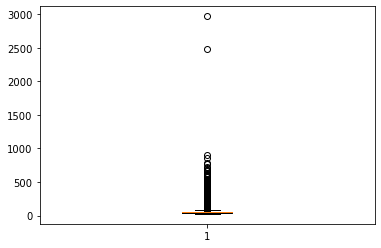

In [21]:
plt.boxplot(nr_events_per_case);

In [ ]:
end_event = df.groupby('Case ID')['Complete Timestamp'].apply(max)
start_event = df.groupby('Case ID')['Complete Timestamp'].apply(min)

## What needs to happen wrt preprocessing

- Remove Extreme #events
- 

In [ ]:
pd.set_option('display.max_columns', None)